# Problem 2


In [1]:
# Import libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

First of all, let's recreate the input graph $G$:

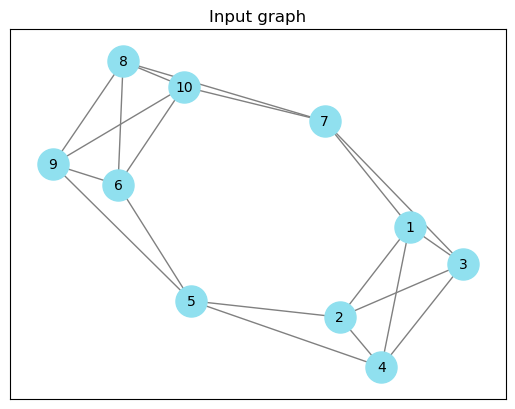

<Figure size 640x480 with 0 Axes>

In [2]:
# Initializing G as an empty graph
G = nx.Graph()

# Defining V and E sets of nodes and edges
V = [i for i in range(1, 11)]

E = [(1, 2), (1, 3), (1, 4), (1, 7), (2, 3),
     (2, 4), (2, 5), (3, 4), (3, 7), (4, 5),
     (5, 6), (5, 9), (6, 8), (6, 9), (6, 10),
     (7, 8), (7, 10), (8, 9), (8, 10), (9, 10)]

# Populating the empty graph
G.add_nodes_from(V)
G.add_edges_from(E)

# Drawing the graph
pos = nx.spring_layout(G)
plt.title('Input graph')
nx.draw_networkx(G, pos, with_labels = True,
                 node_color = '#90e0ef', edge_color = 'gray',
                 node_size = 500, font_size = 10)
plt.savefig('graph.png')
plt.show()

In [ ]:
# Represent the graph
# - Adjacency matrix
# - Adjacency lists
# - Degree matrix

A = nx.adjacency_matrix(G).toarray()

In [27]:
print(dict(G.degree))

{1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4}


#### 1. Find the densest subgraph using the greedy algorithm we saw in class

Given an undirected graph $G = (V, E)$ and a subset of nodes $S \subseteq V$, it is possible to define the induced subgraph $G' = (S, E(S))$ where $E(S) \subseteq E = \{(u, v) \in E \, : \, u, v \in S\}$. Then, the density of $G'$ is defined as:

$$
F(G') = \frac{|E(S)|}{|S|}
$$

The densest subgraph problem consists in finding the subgraph of maximum density, i.e. solving  $\underset{S \subseteq V}{\operatorname{\argmax}}\, F(G')$.

The greedy algorithm we saw in class exploits the intuitive idea that the density can increase removing at each iteration the node with smallest degree.

In [16]:
# Define auxiliary function to compute density
def density(G: nx.Graph) -> float:
    n_edges = len(G.edges)
    n_nodes = len(G.nodes)   # same as len(G)
    if n_nodes == 0:         # handle possible division by 0
        return 0
    else:
        return n_edges / n_nodes

> The built-in NetworkX function `nx.density(G)` calculates density differently from how we defined it: for undirected graphs it returns $d = \frac{2m}{n(n - 1)}$, a value ranging from $0$ (empty graph)
to $1$ (complete graph).

In [28]:
max_density = density(G)
#f_max
S = G.copy()
S_max = set(G.nodes())
E_max = set(G.edges())

print(max_density)

while len(S.nodes) > 1:
    # Find the node with the smallest degree
    print("Nodes:", S.nodes)
    min_degree_node = min(S.degree, key=lambda x: x[1])[0]
    print(dict(S.degree))
    
    # Remove the node with the smallest degree
    print("Node removed:", min_degree_node)
    S.remove_node(min_degree_node) # removes node and all adjacent edges
    
    # Compute the new density
    current_density = density(S)
    print("Density after removal:", current_density)
    
    # If the new density is higher, update the maximum density and corresponding subgraph
    if current_density > max_density:
        max_density = current_density
        S_max = set(S.nodes())
        E_max = set(S.edges())

# Create the densest subgraph from S_max and E_max
densest_subgraph = nx.Graph()
densest_subgraph.add_nodes_from(S_max)
densest_subgraph.add_edges_from(E_max)
print("\nDensest dubgraph:", densest_subgraph.nodes, "\nwith density:", max_density)

2.0
Nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
{1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4}
Node removed: 1
Density after removal: 1.7777777777777777
Nodes: [2, 3, 4, 5, 6, 7, 8, 9, 10]
{2: 3, 3: 3, 4: 3, 5: 4, 6: 4, 7: 3, 8: 4, 9: 4, 10: 4}
Node removed: 2
Density after removal: 1.625
Nodes: [3, 4, 5, 6, 7, 8, 9, 10]
{3: 2, 4: 2, 5: 3, 6: 4, 7: 3, 8: 4, 9: 4, 10: 4}
Node removed: 3
Density after removal: 1.5714285714285714
Nodes: [4, 5, 6, 7, 8, 9, 10]
{4: 1, 5: 3, 6: 4, 7: 2, 8: 4, 9: 4, 10: 4}
Node removed: 4
Density after removal: 1.6666666666666667
Nodes: [5, 6, 7, 8, 9, 10]
{5: 2, 6: 4, 7: 2, 8: 4, 9: 4, 10: 4}
Node removed: 5
Density after removal: 1.6
Nodes: [6, 7, 8, 9, 10]
{6: 3, 7: 2, 8: 4, 9: 3, 10: 4}
Node removed: 7
Density after removal: 1.5
Nodes: [6, 8, 9, 10]
{6: 3, 8: 3, 9: 3, 10: 3}
Node removed: 6
Density after removal: 1.0
Nodes: [8, 9, 10]
{8: 2, 9: 2, 10: 2}
Node removed: 8
Density after removal: 0.5
Nodes: [9, 10]
{9: 1, 10: 1}
Node removed: 9
Dens

In [29]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

#### 2. Find a minimum cut.

Given a graph $G = (V, E)$ a $cut$ is defined as a partition of the nodes in two different sets $C_1,\; C_2$ such that $C_1 \cap C_2 = \emptyset$ and $C_1 \cup C_2 = V$. The $size$ of the cut $(C_1, C_2)$ is then defined as $|E(C_1, C_2)|$.

The $mincut$ problem is the problem of finding a cut $(C_1, C_2)$ that minimizes $|E(C_1, C_2)|$.

s-t cut
https://www.geeksforgeeks.org/minimum-cut-in-a-directed-graph/ 

Karger's algorithm
https://www.geeksforgeeks.org/introduction-and-implementation-of-kargers-algorithm-for-minimum-cut/



#### 3. Demonstrate (by calculating $\lambda_2$, $\phi(G)$, etc.) that Cheeger’s inequalities hold for this graph.

#### 4. Find the cut that satisfies Part 3 (and show that it does)

In [6]:
l = [[910,84,80,36,62,3,0,0,30],
[0,5,0,2,0,0,0,0,0],
[2,22,35,32,12,7,0,0,4],
[0,0,1,6,1,0,0,0,0],
[6,10,56,36,423,165,0,0,15],
[0,0,2,0,1,20,0,0,0],
[0,0,0,0,0,0,0,0,0],
[1,0,0,0,2,5,0,920,4],
[0,0,0,0,0,0,0,0,0]]

s = 0
for lis in l:
    s += sum(lis)

s

3000